# Data Science Foundations Project:

## Predicting movie genres by its plot 

In [2]:
# Importing Data, just importing columns for movie id, movie name, and genres that are in 2 datasets
import pandas as pd

genre = pd.read_csv("/Users/jorgesalazar/Documents/BTS/DSF/MovieSummaries/movie.metadata.tsv", sep = '\t', header = None, usecols = [0,2,8])
genre.head()

,0,2,8
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


In [3]:
#renaming columns
genre.rename(columns={0: "movie_id", 2: "movie_name", 8:'genre'}, inplace=True)
genre.head()

,movie_id,movie_name,genre
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Import movie plots dataset, had to split row by row because every row has a movie with its plot separated by a tab
# and then splitting it into movie id, name and plot

import csv

plots = []

with open("/Users/jorgesalazar/Documents/BTS/DSF/MovieSummaries/plot_summaries.txt", 'r') as f:
    reader = csv.reader(f, dialect='excel-tab') #excel-tab dialect detects tab as a separator
    for row in reader:
        plots.append(row)

In [5]:
movie_id = []
plot = []

for i in plots:
    movie_id.append(i[0])
    plot.append(i[1])

# create dataframe
movies_plot = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

In [6]:
movies_plot.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [7]:
# Merging both datasets to create a dataframe with movie id, name, genre and plot

genre['movie_id'] = genre['movie_id'].astype(str)

movies = pd.merge(movies_plot, genre[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [8]:
# All good, except for the genre column that the genres are listed in dictionaries, the values
# of all the keys are the genres, so lets keep only the values from the dictionaries
# For this, I had to create a list with the values row by row, and the replacing the genre 
# column with the info of the list.

import json

values_genres = [] 

# extract genres
for i in movies['genre']:
    values_genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = values_genres

In [9]:
movies

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."
...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's]
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p..."
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen..."
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama]


In [10]:
# Lets now see if there are some movies without any genres listed

empty = []
for i in movies['genre_new']:
    if i == []:
        empty.append(i)
print(len(empty))

411


In [11]:
# There are 411 movies without any genre, lets delete those rows

movies_new = movies[(movies['genre_new'].str.len() != 0)]

In [12]:
# Now I am left with 41,793 movies that have genres listed
movies_new.shape, movies.shape

((41793, 5), (42204, 5))

In [13]:
# Now that I have all movies with genres on it, lets see how many genres are in this dataset

all_genres = sum(values_genres,[])
len(set(all_genres))

363

In [14]:
# There are 363 different genres listed on the 41,793 movies, lets create a dataframe to show
# what are the most common ones and with how many

type(set(all_genres))

set

In [15]:
import nltk

all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [16]:
#enormous amount of movies with data genres, and a lot of movies with unique movie genres :(
all_genres_df

,Genre,Count
0,Drama,19134
1,World cinema,5153
2,Action/Adventure,3553
3,Science Fiction,2339
4,Action,5868
...,...,...
358,Statutory rape,1
359,Silhouette animation,1
360,Children's Issues,1
361,Homoeroticism,1


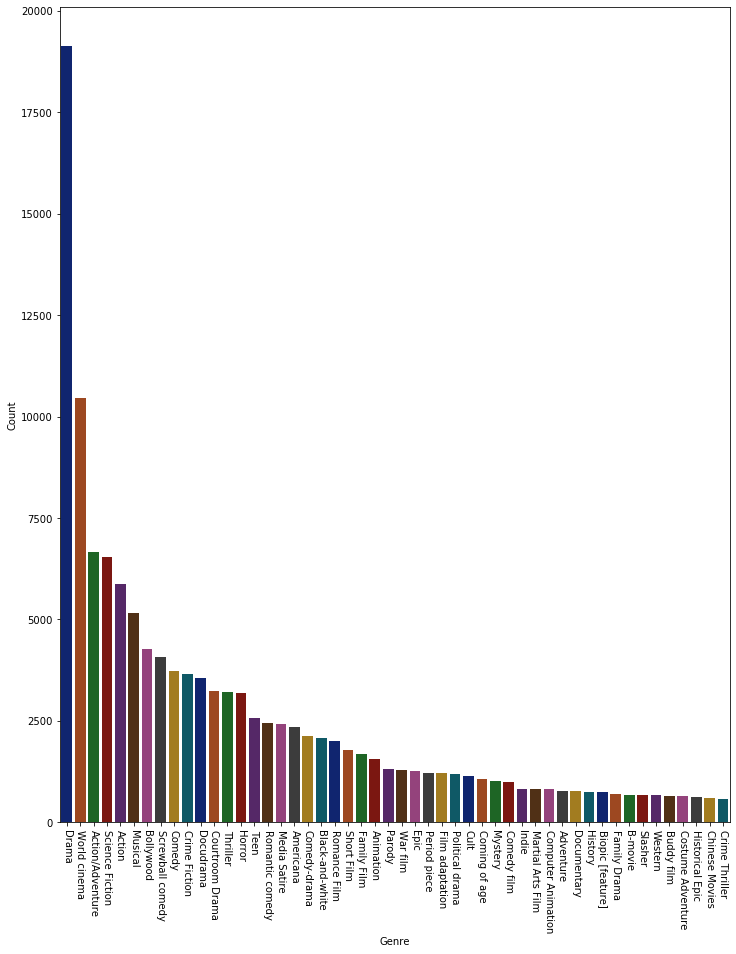

In [18]:
# Lets display the 50 most common genres
import matplotlib.pyplot as plt
import seaborn as sns

histogram = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=histogram, x= "Genre", y = "Count", palette='dark') 
ax.set(ylabel = 'Count') 
ax.set_xticklabels(labels=all_genres_df['Genre'], rotation=270)

plt.show()


In [ ]:
#Here is important to notice how unbalance my data is, there is an enormous amount of Data movies
#also for world cinema, and also there are a lot of movies with unique movie genres. These unbalancing
#affect my training done later because we should look for data where the distribution is relatively
#equal for all classifications in order to do an order prediction

In [19]:
# Now that we have our data ready, before training, I have to clean up the text so it can be
# properly analyzed and vectorized. I have to remove punctuation marks, stop words, empty spaces
# and other noises in my text.

import re
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# calling punctuation marks
punctuations = string.punctuation

# calling stop words list
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def clean_plot(plot):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", plot) 
    # remove everything except letters 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove double whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower()
    
    return text
    

In [20]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_plot(x))

/Users/jorgesalazar/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
movies_new

,movie_id,plot,movie_name,genre,genre_new,clean_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov a hard working taxi driver and lyosha ...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",the nation of panem consists of a wealthy capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan is sentenced for six year...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",the lemon drop kid a new york city swindler is...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],the story is about reema a young muslim school...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p...",in hollywood director leo andreyev looks throu...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen...",american luthier focuses on randy parsons tran...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan a middle aged dry fruit sell...


In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorgesalazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot_2'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))


/Users/jorgesalazar/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
movies_new

,movie_id,plot,movie_name,genre,genre_new,clean_plot,clean_plot_2
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov a hard working taxi driver and lyosha ...,shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",the nation of panem consists of a wealthy capi...,nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan is sentenced for six year...,poovalli induchoodan sentenced six years priso...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",the lemon drop kid a new york city swindler is...,lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...,seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],the story is about reema a young muslim school...,story reema young muslim schoolgirl malabar lo...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p...",in hollywood director leo andreyev looks throu...,hollywood director leo andreyev looks photogra...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen...",american luthier focuses on randy parsons tran...,american luthier focuses randy parsons transfo...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan a middle aged dry fruit sell...,abdur rehman khan middle aged dry fruit seller...


In [ ]:
#eventhough I can say my clean plot 2 is "clean" because it has no punctuation marks and no
#words that are on the stop list, it is important to tell that since during the step of cleaning
#I lowered all words, which affected for proper nouns because now it didnt perceive proper nouns
#as such, they are just words now that wont be removed because they are not in stop words. We can
#see some examples on these when reading some rows of clean_plot_2

In [25]:
keep = movies_new[movies_new['genre_new'].map(len) < 2]

In [ ]:
#Until here, the aim was to do Multilabel Classification, which means that there can be more than
#one output for every entry, which means that there could be many movie genres for one single
#plot, in order to do the training it was complicated because it was not only about multilabeling
#but also multiclassification, which means that the outputs are not binary and linear regression
#could not be done with this. So because of this, with this code above I am removing all movies where
#there are more than 1 movie genres so I wont work with multilabel but only with multiclass.

In [26]:
#this is the result from removing movies with more than one genre. As you can see the genre_new colum
#has only one genre per movie
keep

,movie_id,plot,movie_name,genre,genre_new,clean_plot,clean_plot_2
10,15401493,Lola attempts to gain her father's trust fund...,Husband for Hire,"{""/m/01z4y"": ""Comedy""}",[Comedy],lola attempts to gain her fathers trust fund b...,lola attempts gain fathers trust fund hiring h...
15,24448645,"Despite Lucy's reservations, she agrees to her...",Forest of the Damned 2,"{""/m/03npn"": ""Horror""}",[Horror],despite lucys reservations she agrees to her h...,despite lucys reservations agrees husband requ...
17,4018288,"Debbie's favorite band is Dream Street, and he...",The Biggest Fan,"{""/m/07s9rl0"": ""Drama""}",[Drama],debbies favorite band is dream street and her ...,debbies favorite band dream street favorite me...
22,29062594,A group of teenagers at Catholic boarding scho...,A la salida nos vemos,"{""/m/07s9rl0"": ""Drama""}",[Drama],a group of teenagers at catholic boarding scho...,group teenagers catholic boarding school provi...
25,8388648,The film opens with Madhav and Sreenu playin...,Nee Sneham,"{""/m/07s9rl0"": ""Drama""}",[Drama],the film opens with madhav and sreenu playing ...,film opens madhav sreenu playing football cup ...
...,...,...,...,...,...,...,...
42188,21972773,"The film revolves around Nandhan , a Lankan yo...",Guiness Vision,"{""/m/02kdv5l"": ""Action""}",[Action],the film revolves around nandhan a lankan yout...,film revolves around nandhan lankan youth kidn...
42196,29046736,Lucy is working as a dancer in a sleazy strip...,I Don't Want to Be Born,"{""/m/03npn"": ""Horror""}",[Horror],lucy is working as a dancer in a sleazy strip ...,lucy working dancer sleazy strip joint stage a...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],the story is about reema a young muslim school...,story reema young muslim schoolgirl malabar lo...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan a middle aged dry fruit sell...,abdur rehman khan middle aged dry fruit seller...


In [27]:
#my attempt to remove it as lists type and making it strings
values_genres_again = [] 

# extract genres
for i in keep['genre_new']:
    values_genres_again.append(i) 

# add to 'movies' dataframe  
keep['genre_new_final'] = values_genres_again

/Users/jorgesalazar/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [28]:
keep.head()

,movie_id,plot,movie_name,genre,genre_new,clean_plot,clean_plot_2,genre_new_final
10,15401493,Lola attempts to gain her father's trust fund...,Husband for Hire,"{""/m/01z4y"": ""Comedy""}",[Comedy],lola attempts to gain her fathers trust fund b...,lola attempts gain fathers trust fund hiring h...,[Comedy]
15,24448645,"Despite Lucy's reservations, she agrees to her...",Forest of the Damned 2,"{""/m/03npn"": ""Horror""}",[Horror],despite lucys reservations she agrees to her h...,despite lucys reservations agrees husband requ...,[Horror]
17,4018288,"Debbie's favorite band is Dream Street, and he...",The Biggest Fan,"{""/m/07s9rl0"": ""Drama""}",[Drama],debbies favorite band is dream street and her ...,debbies favorite band dream street favorite me...,[Drama]
22,29062594,A group of teenagers at Catholic boarding scho...,A la salida nos vemos,"{""/m/07s9rl0"": ""Drama""}",[Drama],a group of teenagers at catholic boarding scho...,group teenagers catholic boarding school provi...,[Drama]
25,8388648,The film opens with Madhav and Sreenu playin...,Nee Sneham,"{""/m/07s9rl0"": ""Drama""}",[Drama],the film opens with madhav and sreenu playing ...,film opens madhav sreenu playing football cup ...,[Drama]


In [29]:
#with this now it says that there are only 122 genres in my data
all_genres_again = sum(values_genres_again,[])
len(set(all_genres_again))

122

In [30]:
#adding the frequency for all of them to see the most common ones
all_clean_genres = nltk.FreqDist(all_genres_again) 

# create dataframe
all_clean_genres_df = pd.DataFrame({'Genre': list(all_clean_genres.keys()), 
                              'Count': list(all_clean_genres.values())})

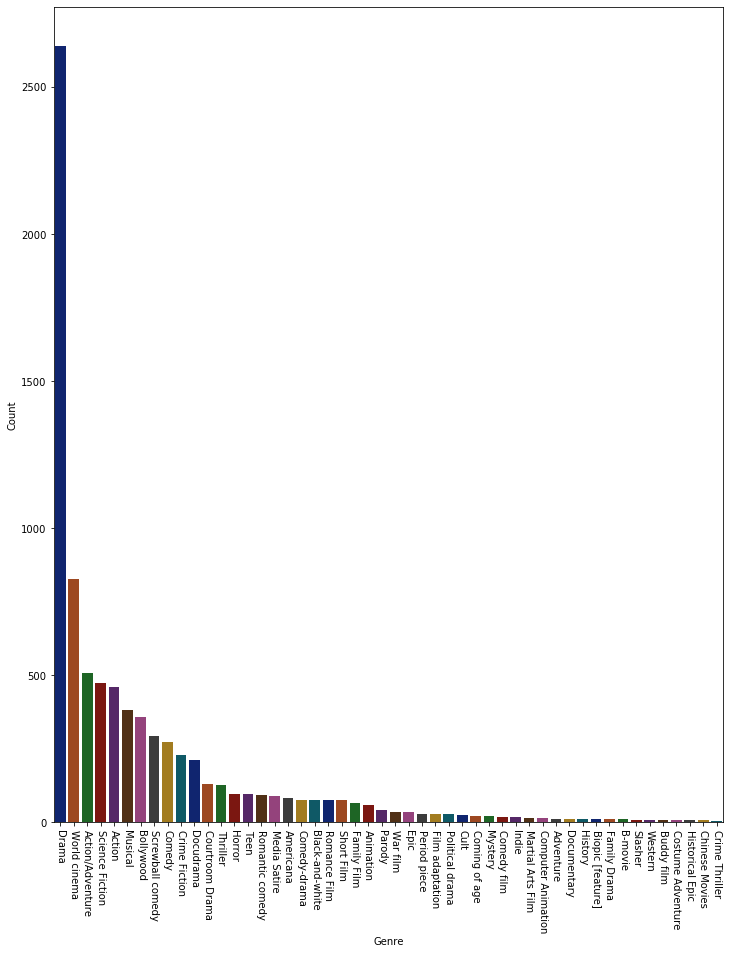

In [31]:
#even though the number is highly reduced, still drama movies are very dominant and create a lot
#of noise to my data. I expect to do so undersampling, or oversampling in order to help balancing
#my data.
histogram = all_clean_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=histogram, x= "Genre", y = "Count", palette='dark') 
ax.set(ylabel = 'Count') 
ax.set_xticklabels(labels=all_genres_df['Genre'], rotation=270)

plt.show()

In [32]:
keep

,movie_id,plot,movie_name,genre,genre_new,clean_plot,clean_plot_2,genre_new_final
10,15401493,Lola attempts to gain her father's trust fund...,Husband for Hire,"{""/m/01z4y"": ""Comedy""}",[Comedy],lola attempts to gain her fathers trust fund b...,lola attempts gain fathers trust fund hiring h...,[Comedy]
15,24448645,"Despite Lucy's reservations, she agrees to her...",Forest of the Damned 2,"{""/m/03npn"": ""Horror""}",[Horror],despite lucys reservations she agrees to her h...,despite lucys reservations agrees husband requ...,[Horror]
17,4018288,"Debbie's favorite band is Dream Street, and he...",The Biggest Fan,"{""/m/07s9rl0"": ""Drama""}",[Drama],debbies favorite band is dream street and her ...,debbies favorite band dream street favorite me...,[Drama]
22,29062594,A group of teenagers at Catholic boarding scho...,A la salida nos vemos,"{""/m/07s9rl0"": ""Drama""}",[Drama],a group of teenagers at catholic boarding scho...,group teenagers catholic boarding school provi...,[Drama]
25,8388648,The film opens with Madhav and Sreenu playin...,Nee Sneham,"{""/m/07s9rl0"": ""Drama""}",[Drama],the film opens with madhav and sreenu playing ...,film opens madhav sreenu playing football cup ...,[Drama]
...,...,...,...,...,...,...,...,...
42188,21972773,"The film revolves around Nandhan , a Lankan yo...",Guiness Vision,"{""/m/02kdv5l"": ""Action""}",[Action],the film revolves around nandhan a lankan yout...,film revolves around nandhan lankan youth kidn...,[Action]
42196,29046736,Lucy is working as a dancer in a sleazy strip...,I Don't Want to Be Born,"{""/m/03npn"": ""Horror""}",[Horror],lucy is working as a dancer in a sleazy strip ...,lucy working dancer sleazy strip joint stage a...,[Horror]
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],the story is about reema a young muslim school...,story reema young muslim schoolgirl malabar lo...,[Children's]
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan a middle aged dry fruit sell...,abdur rehman khan middle aged dry fruit seller...,[Drama]


In [33]:
#since I will work only with the genre and plot columns, I am staying with only those 2 columns

col = ['genre_new_final', 'clean_plot_2']
keep2 = keep[col].astype(str)


In [34]:
keep2

,genre_new_final,clean_plot_2
10,['Comedy'],lola attempts gain fathers trust fund hiring h...
15,['Horror'],despite lucys reservations agrees husband requ...
17,['Drama'],debbies favorite band dream street favorite me...
22,['Drama'],group teenagers catholic boarding school provi...
25,['Drama'],film opens madhav sreenu playing football cup ...
...,...,...
42188,['Action'],film revolves around nandhan lankan youth kidn...
42196,['Horror'],lucy working dancer sleazy strip joint stage a...
42199,"[""Children's""]",story reema young muslim schoolgirl malabar lo...
42202,['Drama'],abdur rehman khan middle aged dry fruit seller...


In [35]:
#renaming the columns
keep2.columns = ['Genre', 'Plot']
keep2

,Genre,Plot
10,['Comedy'],lola attempts gain fathers trust fund hiring h...
15,['Horror'],despite lucys reservations agrees husband requ...
17,['Drama'],debbies favorite band dream street favorite me...
22,['Drama'],group teenagers catholic boarding school provi...
25,['Drama'],film opens madhav sreenu playing football cup ...
...,...,...
42188,['Action'],film revolves around nandhan lankan youth kidn...
42196,['Horror'],lucy working dancer sleazy strip joint stage a...
42199,"[""Children's""]",story reema young muslim schoolgirl malabar lo...
42202,['Drama'],abdur rehman khan middle aged dry fruit seller...


In [36]:
#creating a genre id that ennumerates all the types of genres listed
keep2['genre_id'] = keep2['Genre'].factorize()[0]
keep2

,Genre,Plot,genre_id
10,['Comedy'],lola attempts gain fathers trust fund hiring h...,0
15,['Horror'],despite lucys reservations agrees husband requ...,1
17,['Drama'],debbies favorite band dream street favorite me...,2
22,['Drama'],group teenagers catholic boarding school provi...,2
25,['Drama'],film opens madhav sreenu playing football cup ...,2
...,...,...,...
42188,['Action'],film revolves around nandhan lankan youth kidn...,5
42196,['Horror'],lucy working dancer sleazy strip joint stage a...,1
42199,"[""Children's""]",story reema young muslim schoolgirl malabar lo...,75
42202,['Drama'],abdur rehman khan middle aged dry fruit seller...,2


In [37]:
genre_id_df = keep2[['Genre', 'genre_id']].drop_duplicates().sort_values('genre_id')
genre_to_id = dict(genre_id_df.values)
id_to_genre = dict(genre_id_df[['genre_id', 'Genre']].values)
keep2.head()

,Genre,Plot,genre_id
10,['Comedy'],lola attempts gain fathers trust fund hiring h...,0
15,['Horror'],despite lucys reservations agrees husband requ...,1
17,['Drama'],debbies favorite band dream street favorite me...,2
22,['Drama'],group teenagers catholic boarding school provi...,2
25,['Drama'],film opens madhav sreenu playing football cup ...,2


In [38]:
keep2.sort_values(by='Genre')

,Genre,Plot,genre_id
11441,"[""Children's""]",film begins chorus santas elves played childre...,75
14774,"[""Children's""]",claudia middle child busy family smart respons...,75
20216,"[""Children's""]",mammootty plays lead role manu l l b btech ele...,75
8476,"[""Children's""]",two year old blind girls marie inga close frie...,75
7731,"[""Children's""]",forest ranger vijayaraghavan school going kid ...,75
...,...,...,...
37754,['Wuxia'],master kung lo pa two police officers white ho...,79
29400,['Wuxia'],film starts two student fighting inheritance d...,79
21185,['Zombie Film'],small sleepy town utah gets undead wake call t...,62
5100,['Zombie Film'],brooklyn garage band general malacarne survive...,62


In [41]:
#using tf-idf for vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#sublinear_tf is for using a logarithmic form of frequency
#min_df is for the minimum of plots the word has to be included in order to be processed
#n-gram is for studying word by word, or by groups of 2, I am doing both
features = tfidf.fit_transform(keep2.Plot).toarray()
labels = keep2.genre_id
features.shape

(8424, 769114)

In [42]:
#this code below displays the most common single-words and pair of word related for each label
#(genre)

#it works but it takes hours to run so dont run it!!
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Genre, genre_id in sorted(genre_to_id.items()):
    features_chi2 = chi2(features, labels == genre_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Genre))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '["Children's"]':
  . Most correlated unigrams:
. vinu
. nonno
  . Most correlated bigrams:
. poetry film
. film mental


KeyboardInterrupt: 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(keep2['Plot'], keep2['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [46]:
#predicting for a string
print(clf.predict(count_vect.transform(["nono"])))

["['Drama']"]


In [47]:
clf.predict(count_vect.transform(['car']))

array(["['Drama']"], dtype='<U26')

In [49]:
def predict_genre():
    plot = input()
    print(clf.predict(count_vect.transform([plot])))

# Conclusion

### The predicting model definetely does not work because it tends to 'predict' that any word or sentence entered will classify it as for a Drama movie. This is because as mentioned before, there is a really big difference in number of drama movies compared to the rest. This means that our project learned a very huge variety of words (almost any) to be classified as Drama. On the other hand, there are genres that were even ignored for the low tf-idf scored and so my program could not be trained properly to identify these not-that-common movie genres. This project is missing to balance the dataset. It is known there are some ways that could help in this issue. Some of them are: a) Deleting samples to neutralize and make the distribution of variables more even b) Adding samples c) Undersampling, a process of reducing 'value' or 'weight' to the most common or majority of labels identified and; d) Oversampling, on the other hand, which gives more value or weight to not so common labels so they can be evened and help to balance the data. Due to lack of time I couldn't fix the problem properly